# Differential equations with Julia

## Michał Bernardelli

In [1]:
using DifferentialEquations
using Plots

#### ODEProblemLibrary.prob_ode_linear

![prob_ode_linear](ex1_prob_ode_linear.png)

In [2]:
# parameter 
alpha = 1.01;

In [3]:
# Out-of-place functions
f(u, p, t) = alpha * u;
u0 = 1/2;
tspan = (0.0, 1.0);
prob = ODEProblem(f, u0, tspan);
sol = solve(prob);

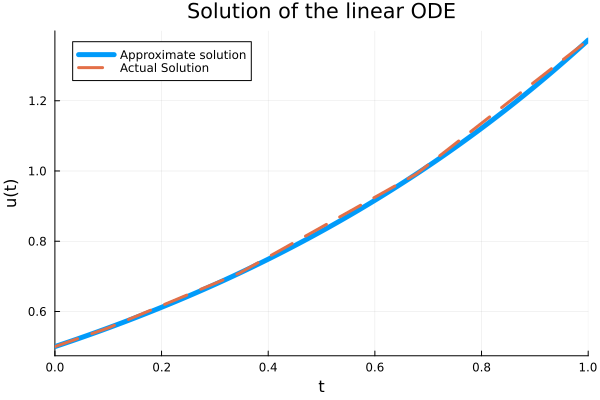

In [4]:
plot(sol, linewidth = 5, title = "Solution of the linear ODE", xaxis = "t", yaxis = "u(t)", label = "Approximate solution")
plot!(sol.t, t -> 0.5 * exp(alpha*t), lw = 3, ls = :dash, label = "Actual Solution")

In [5]:
sol.t

5-element Vector{Float64}:
 0.0
 0.09964258706516003
 0.3457024247583422
 0.6776921908052249
 1.0

In [6]:
sol.u

5-element Vector{Float64}:
 0.5
 0.552938681151017
 0.7089376245893467
 0.9913594502399238
 1.3728004409033037

In [7]:
# value of the solution at selected point, e.g. 0.2
sol(0.2)

0.6119240245530987

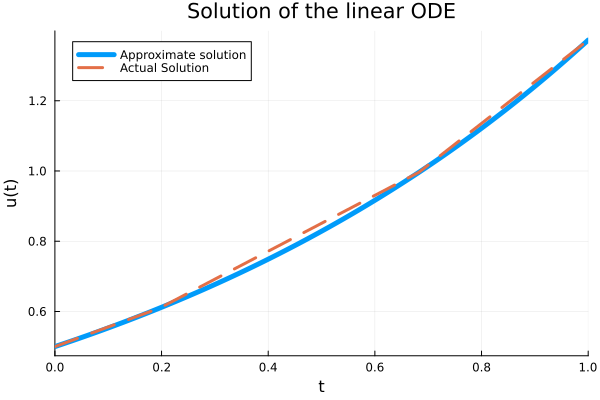

In [8]:
# lower accuracy
sol2 = solve(prob, reltol = 1e-2, abstol = 1e-2);
plot(sol2, linewidth = 5, title = "Solution of the linear ODE", xaxis = "t", yaxis = "u(t)", label = "Approximate solution")
plot!(sol2.t, t -> 0.5 * exp(alpha*t), lw = 3, ls = :dash, label = "Actual Solution")

In [9]:
sol2.u

4-element Vector{Float64}:
 0.5
 0.6098575462845294
 0.9963939687220439
 1.3727997725845866

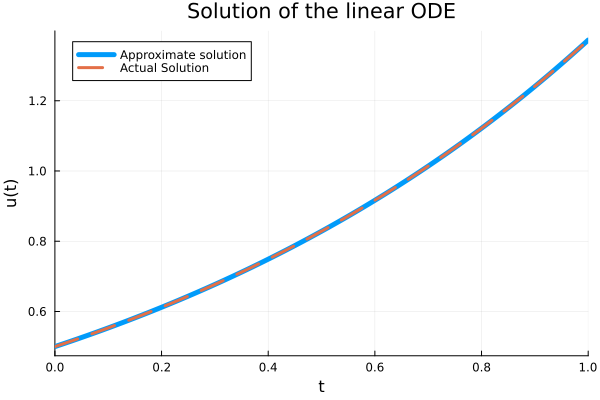

In [10]:
# higher accuracy
sol3 = solve(prob, reltol = 1e-14, abstol = 1e-14);
plot(sol3, linewidth = 5, title = "Solution of the linear ODE", xaxis = "t", yaxis = "u(t)", label = "Approximate solution")
plot!(sol3.t, t -> 0.5 * exp(alpha*t), lw = 3, ls = :dash, label = "Actual Solution")

In [11]:
sol3.u

33-element Vector{Float64}:
 0.5
 0.5030607544114138
 0.5084858222619822
 0.5170823072395272
 0.5278251325087624
 0.5401371317855586
 0.5542892368251977
 0.5700103856039416
 0.5873636775526352
 0.6061628060483898
 0.6264087661277773
 0.6480244477649643
 0.6709751457947637
 ⋮
 0.9340638260454618
 0.9696319401994442
 1.0065390078427732
 1.0448220087387348
 1.0845080812631074
 1.1256519451420628
 1.1682721153746913
 1.2124341092083537
 1.2581711352647809
 1.3055472436743087
 1.3545949480300603
 1.372800507508458

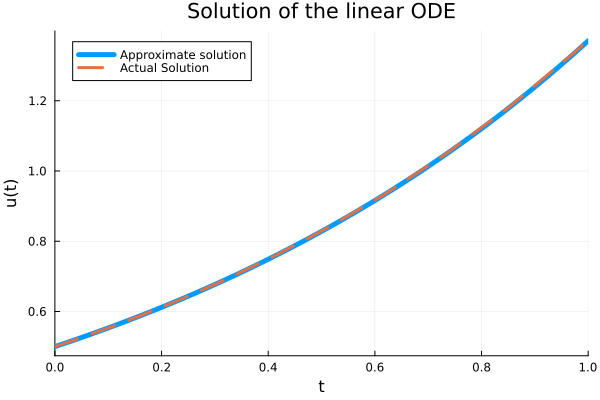

In [12]:
# Midpoint algorithm
sol_midpoint = solve(prob, alg = Midpoint(), reltol = 1e-2, abstol = 1e-2)
plot(sol_midpoint, linewidth = 5, title = "Solution of the linear ODE", xaxis = "t", yaxis = "u(t)", label = "Approximate solution")
plot!(sol_midpoint.t, t -> 0.5 * exp(alpha*t), lw = 3, ls = :dash, label = "Actual Solution")

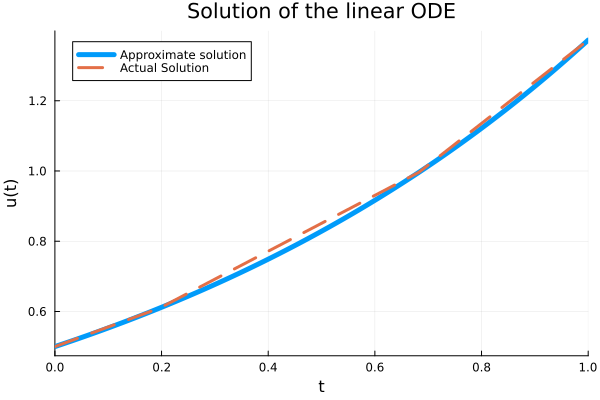

In [13]:
# AutoTsit5 algorithm
sol_AutoTsit5 = solve(prob, alg = AutoTsit5(Rosenbrock23()), reltol = 1e-2, abstol = 1e-2)
plot(sol_AutoTsit5, linewidth = 5, title = "Solution of the linear ODE", xaxis = "t", yaxis = "u(t)", label = "Approximate solution")
plot!(sol_AutoTsit5.t, t -> 0.5 * exp(alpha*t), lw = 3, ls = :dash, label = "Actual Solution")

In [14]:
sol_midpoint.u
sol_AutoTsit5.u

4-element Vector{Float64}:
 0.5
 0.6098575462845294
 0.9963939687220439
 1.3727997725845866

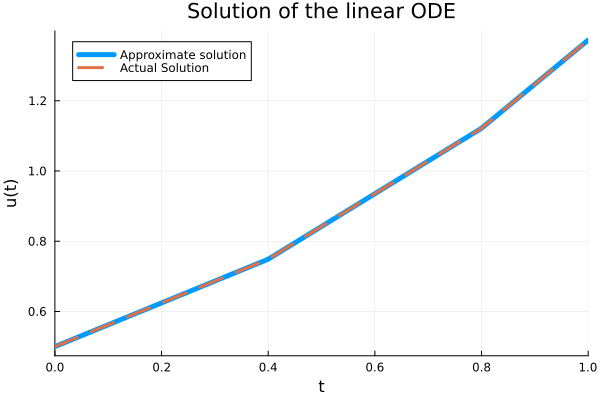

In [15]:
# saveat parameter
sol_saveat = solve(prob, reltol = 1e-2, abstol = 1e-2, saveat = 0.4)
plot(sol_saveat, linewidth = 5, title = "Solution of the linear ODE", xaxis = "t", yaxis = "u(t)", label = "Approximate solution")
plot!(sol_saveat.t, t -> 0.5 * exp(alpha*t), lw = 3, ls = :dash, label = "Actual Solution")

In [16]:
sol_saveat.t

4-element Vector{Float64}:
 0.0
 0.4
 0.8
 1.0

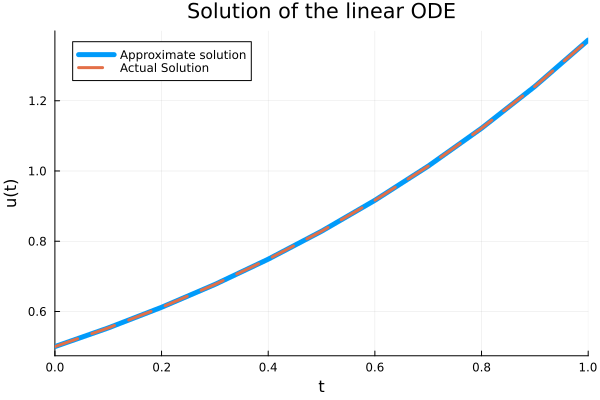

In [17]:
# saveat parameter
sol_saveat = solve(prob, reltol = 1e-2, abstol = 1e-2, saveat = 0.1)
plot(sol_saveat, linewidth = 5, title = "Solution of the linear ODE", xaxis = "t", yaxis = "u(t)", label = "Approximate solution")
plot!(sol_saveat.t, t -> 0.5 * exp(alpha*t), lw = 3, ls = :dash, label = "Actual Solution")

In [18]:
sol_saveat.t

11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

#### Predefined problems from DiffEqProblemLibrary.jl

In [19]:
# load linear problem from ODEProblemLibrary
# using DiffEqProblemLibrary.ODEProblemLibrary
# prob = ODEProblemLibrary.prob_ode_linear

#### System of equations (Van der Pol Equations)

![prob_vanderpol](ex2_van_der_pol.png)

In [20]:
# load problem ODEProblemLibrary
# prob_ode_vanderpol = ODEProblemLibrary.prob_ode_vanderpol
# sol = solve(prob_ode_vanderpol)
# plot(sol, linewidth = 5, title = "Solution of the Solution of the Van der Pol Equations", xaxis = "t", yaxis = "u(t)", label = "Approximate solution")

In [21]:
# in-place function
μ = 10^6
function van!(du, u, p, t)
    du[1] = μ * ((1 - u[1]^2) * u[2] - u[1])
    du[2] = u[2]
end

van! (generic function with 1 method)

In [22]:
u0 = [0; sqrt(3)]
tspan = (0.0, 1.0)
prob_ode_vanderpol = ODEProblem(van!, u0, tspan)
sol = solve(prob_ode_vanderpol)
sol.u

54-element Vector{Vector{Float64}}:
 [0.0, 1.7320508075688772]
 [0.000999134363957248, 1.7320508085683002]
 [0.010958397076572982, 1.73205081856253]
 [0.0725443996964946, 1.7320508818124083]
 [0.2005038109249363, 1.7320510239780342]
 [0.36758056090290175, 1.7320512470758]
 [0.5200031888172162, 1.7320515308620494]
 [0.6196425900326429, 1.7320518254238235]
 [0.6864172051752879, 1.7320521783539082]
 [0.7226509150086028, 1.73205257178035]
 [0.740761192059053, 1.7320530331625206]
 [0.7483860935154016, 1.732053566716141]
 [0.7511476239755946, 1.7320542026429961]
 ⋮
 [0.7995373541029991, 2.2157677587125697]
 [0.8085381903517199, 2.334240002694655]
 [0.8178962786643117, 2.4696700400484026]
 [0.8274670061638307, 2.6232008738863413]
 [0.8371558378929299, 2.7968153318481184]
 [0.8468516499287303, 2.9923470114278845]
 [0.8564859827923647, 3.2125916577993796]
 [0.8659794602320253, 3.4603714562096877]
 [0.8752861288633738, 3.7396569389748326]
 [0.8843519480053978, 4.054698781581105]
 [0.893147711581

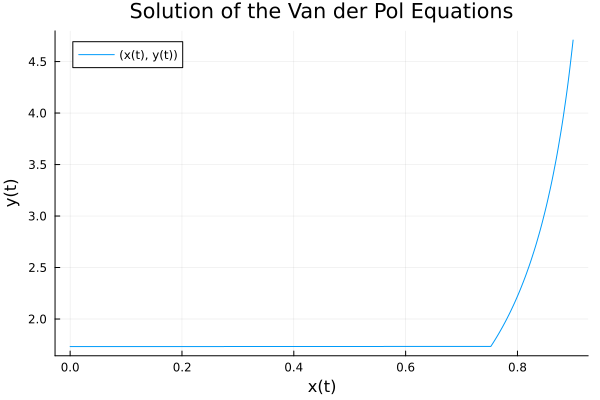

In [23]:
#  2D phase space plot
plot(sol, idxs = (1, 2), title = "Solution of the Van der Pol Equations", linewidth = 1, label = "(x(t), y(t))", xaxis = "x(t)", yaxis = "y(t)")

Plots.AnimatedGif("C:\\!Programy\\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\\Day-4a_Differential-equations\\vanderpol.gif")
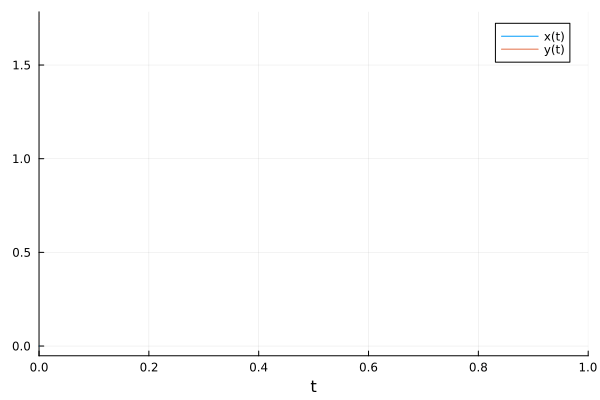

In [24]:
animate(sol, every = 2,  fps = 10, label = ["x(t)" "y(t)"], "vanderpol.gif")

#### System of equations (Lorenz equations)

![prob_lorenz](ex3_lorenz.png)

In [25]:
# in-place function
function lorenz!(du, u, p, t)
    du[1] = 10.0 * (u[2] - u[1])
    du[2] = u[1] * (28.0 - u[3]) - u[2]
    du[3] = u[1] * u[2] - (8/3) * u[3]
end

lorenz! (generic function with 1 method)

In [26]:
u0 = [1.0; 0.0; 0.0]
tspan = (0.0, 100.0)
prob = ODEProblem(lorenz!, u0, tspan)
sol = solve(prob)
sol.u

1281-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591550149778, 0.08977063252764937, 0.0001438019170127846]
 [0.924204355043198, 0.242289149116772, 0.0010461625397616113]
 [0.8800455796215916, 0.4387364900041282, 0.0034242599668253874]
 [0.8483309836977301, 0.6915629475762161, 0.008487624968655677]
 [0.8495036679850485, 1.0145426495980538, 0.018212090123888365]
 [0.9139069520070257, 1.4425599557988966, 0.03669382071284047]
 [1.0888638157267199, 2.052326562845511, 0.07402573450924263]
 [1.4608626762755585, 3.0206719763684764, 0.160039355072216]
 [2.162723385463873, 4.6333636144497445, 0.3771173678677311]
 [3.3684642325435363, 7.267693727122867, 0.9363555414291395]
 ⋮
 [2.4154751319743304, 0.9019051839955854, 23.10904521543824]
 [1.9010431518181314, 2.075631191607503, 18.469762607052317]
 [2.3313747500610864, 3.427114121484939, 15.773720459660

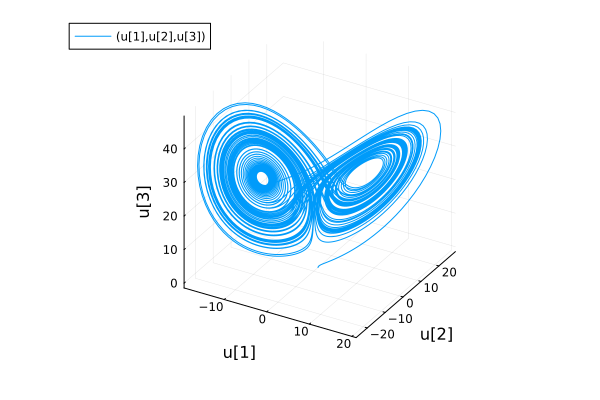

In [27]:
#  3D phase space plot
plot(sol, idxs = (1, 2, 3))

The camera attribute takes two real numbers, azimuthal and elevation. These values corresponds to Azimuth and Altitude (on the diagram).
<div> <img src="Azimuth-Altitude_schematic.svg.png" alt="Diagram" style="width: 400px;"/></div> 
source: https://en.wikipedia.org/wiki/Azimuth

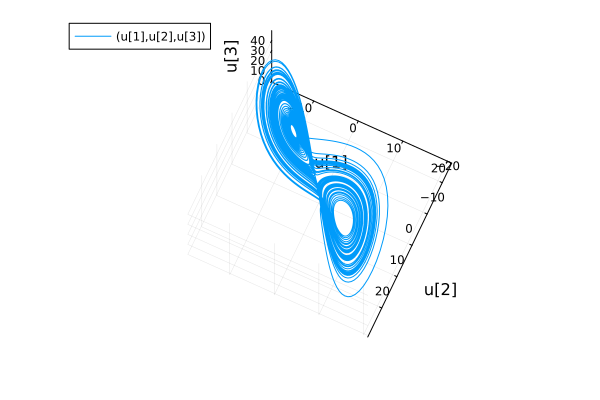

In [28]:
plot(sol, idxs = (1, 2, 3), camera=(-25, -75))

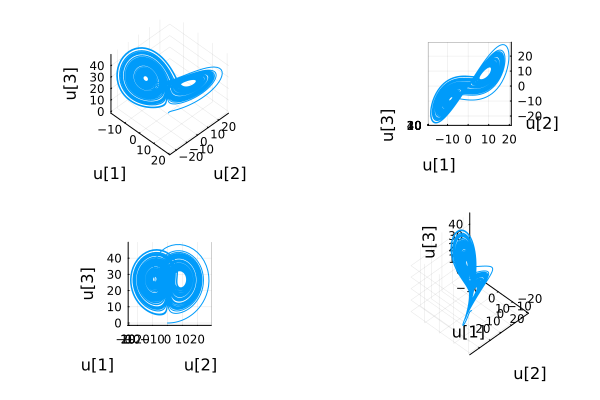

In [29]:
#  3D phase space plot
p1 = plot(sol, idxs = (1, 2, 3), camera=(45, 45))
p2 = plot(sol, idxs = (1, 2, 3), camera=(0, 90))
p3 = plot(sol, idxs = (1, 2, 3), camera=(90, 0))
p4 = plot(sol, idxs = (1, 2, 3), camera=(-45, -45))
plot(p1, p2, p3, p4, layout=(2,2), legend=false)

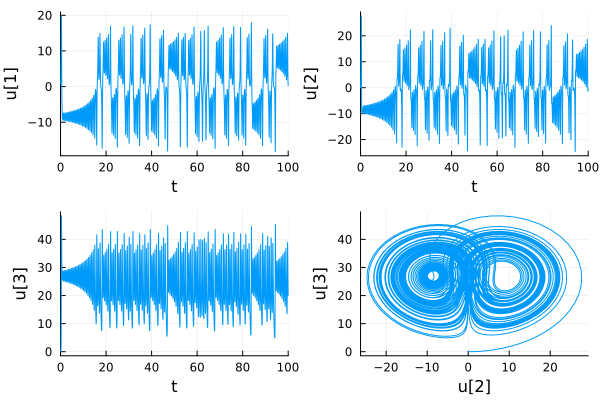

In [30]:
# first component only
p1 = plot(sol, idxs = (0, 1))
# second component only
p2 = plot(sol, idxs = (0, 2))
# third component only
p3 = plot(sol, idxs = (0, 3))
# second and third component
p4 = plot(sol, idxs = (2, 3))
plot(p1, p2, p3, p4, layout=(2,2), legend=false)

Plots.AnimatedGif("C:\\!Programy\\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\\Day-4a_Differential-equations\\lorenz.gif")
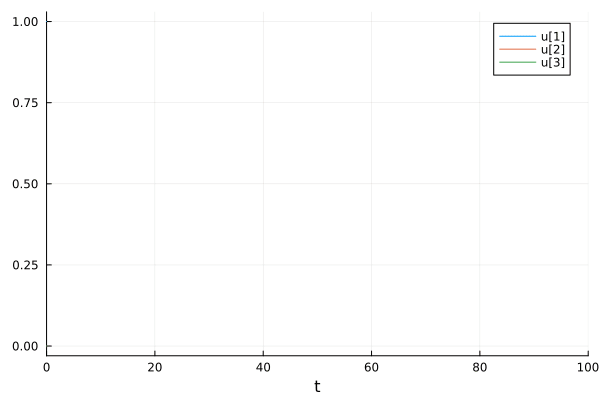

In [31]:
animate(sol, every = 10,  fps = 10, "lorenz.gif")

#### Defining parameterized functions

3-element Vector{Float64}:
 0.5
 0.5012580251693002
 0.5050250835420841

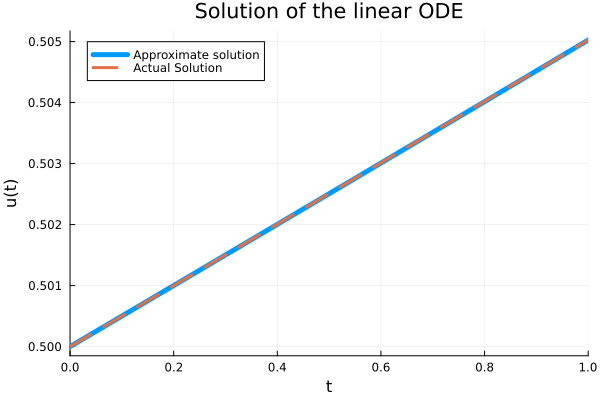

In [32]:
# ODEProblemLibrary.prob_ode_linear with parameter
alpha = 0.01
g(u, p, t) = p * u;
u0 = 1/2;
tspan = (0.0, 1.0);
prob = ODEProblem(f, u0, tspan, alpha);
sol = solve(prob);
display(sol.u)
plot(sol, linewidth = 5, title = "Solution of the linear ODE", xaxis = "t", yaxis = "u(t)", label = "Approximate solution")
plot!(sol.t, t -> 0.5 * exp(alpha*t), lw = 3, ls = :dash, label = "Actual Solution")

8-element Vector{Float64}:
 0.5
 0.5946443932638155
 0.8000127328680215
 1.1431179345486775
 1.7808840584593943
 2.9793956876426617
 5.3716320884868365
 6.0912289969678435

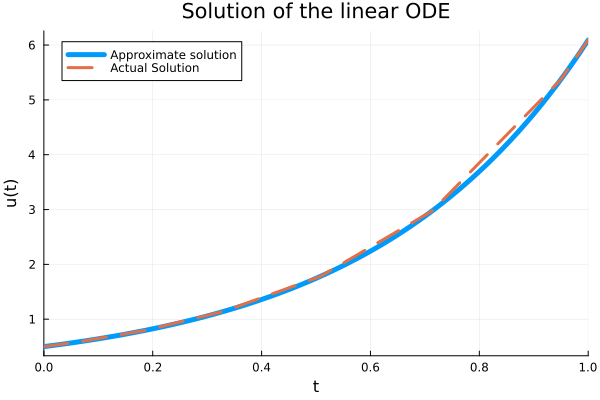

In [33]:
# ODEProblemLibrary.prob_ode_linear with parameter
alpha = 2.5
g(u, p, t) = p * u;
u0 = 1/2;
tspan = (0.0, 1.0);
prob = ODEProblem(f, u0, tspan, alpha);
sol = solve(prob);
display(sol.u)
plot(sol, linewidth = 5, title = "Solution of the linear ODE", xaxis = "t", yaxis = "u(t)", label = "Approximate solution")
plot!(sol.t, t -> 0.5 * exp(alpha*t), lw = 3, ls = :dash, label = "Actual Solution")

Plots.AnimatedGif("C:\\!Programy\\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\\Day-4a_Differential-equations\\tmp.gif")
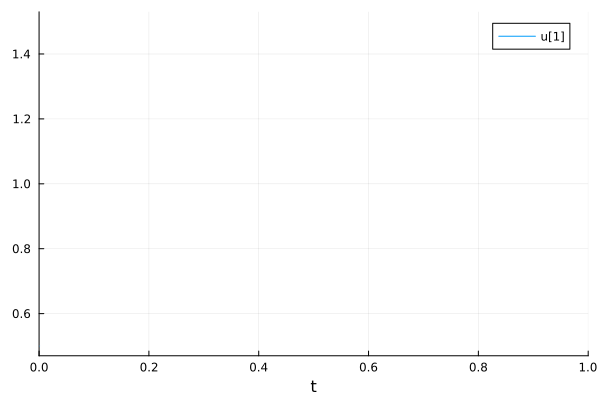

In [34]:
animate(sol)

In [35]:
# lorenz with parameter
function parameterized_lorenz!(du, u, p, t)
    du[1] = p[1] * (u[2] - u[1])
    du[2] = u[1] * (p[2] - u[3]) - u[2]
    du[3] = u[1] * u[2] - p[3] * u[3]
end

parameterized_lorenz! (generic function with 1 method)

In [36]:
u0 = [1.0, 0.0, 0.0]
tspan = (0.0, 1.0)
p = [10.0, 28.0, 8/3]
prob = ODEProblem(parameterized_lorenz!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

In [37]:
# nicer version
function parameterized_lorenz_2!(du, u, p, t)
    x, y, z = u
    σ, ρ, β = p
    du[1] = dx = σ * (y - x)
    du[2] = dy = x * (ρ - z) - y
    du[3] = dz = x * y - β * z
end

parameterized_lorenz_2! (generic function with 1 method)

In [38]:
u0 = [1.0, 0.0, 0.0]
tspan = (0.0, 1.0)
p = [10.0, 28.0, 8/3]
prob = ODEProblem(parameterized_lorenz_2!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

In [39]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 28-element Vector{Float64}:
 0.0
 3.5678604836301404e-5
 0.0003924646531993154
 0.0032624087100077666
 0.009058076582749423
 0.016956470605311864
 0.027689959227781235
 0.04185635103821218
 0.060240410627700816
 0.0836854113984534
 0.11336499269451543
 0.14862181409827
 0.18703978025370946
 ⋮
 0.37221158152511746
 0.4201373199451134
 0.4637204183034679
 0.504946073924883
 0.5570623245742057
 0.6068388057939043
 0.669020447362476
 0.7276641343167435
 0.7988542865022868
 0.8763208592325533
 0.9661629617040817
 1.0
u: 28-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591550149778, 0.08977063252764937, 0.0001438019170127846]
 [0.924204355043198, 0.242289149116772, 0.0010461625397616113]
 [0.8800455796215916, 0.4

*Preparation of this workshop has been supported by the Polish National Agency for Academic Exchange under the Strategic Partnerships programme, grant number BPI/PST/2021/1/00069/U/00001.*

![SGH & NAWA](logo.png)